In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Read The DataSet

In [2]:
df = pd.read_csv('archive/mnist_train.csv')

In [4]:
df.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
print("Shape of data set (row,col)")
print(df.shape)

Shape of data set (row,col)
(60000, 785)


# Data Preprocessing

In [10]:
# Spliting independent & dependent columns
X = df.iloc[:,1:]
y = df.iloc[:,0]

In [11]:
X

,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,1x10,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
y

0        5
1        0
2        4
3        1
4        9
        ..
59995    8
59996    3
59997    5
59998    6
59999    8
Name: label, Length: 60000, dtype: int64

In [13]:
# Converting into floating point
X = X.astype('float32')
y = y.astype('float32')

In [14]:
print("Shape (row,col) = ")
print(X.shape)
print(y.shape)

Shape (row,col) = 
(60000, 784)
(60000,)


In [15]:
# Converting into numpy array
X_train = X.values
y_train = y.values

# Reshaping
X_train = X_train.reshape(X_train.shape[0],28,28,1)

# Normalizing all values into 0 & 1
X_train/=255

# Model Training

In [16]:
input_shape = (28,28,1)

In [17]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,Dropout,Flatten, MaxPooling2D

In [19]:
model = Sequential()

#Convolution Layer
model.add(Conv2D(filters=32, kernel_size=(3,3),activation = 'relu' ,input_shape=input_shape))
# Max Pooling
model.add(MaxPooling2D(pool_size=(2, 2),strides=2))

model.add(Conv2D(filters=32, kernel_size=(3,3),activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2, 2),strides=2))

# Flattening the 2D arrays for fully connected layers
model.add(Flatten()) 

# Fully Connected Artificial Neural Networks
model.add(Dense(128, activation=tf.nn.relu))
model.add(Dense(64, activation=tf.nn.softmax))
model.add(Dense(10, activation=tf.nn.softmax))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.fit(x=X_train,y=y_train, epochs=15)

Epoch 1/15
1875/1875 [==============================] - 21s 11ms/step - loss: 1.5763 - accuracy: 0.3890
Epoch 2/15
1875/1875 [==============================] - 21s 11ms/step - loss: 1.0270 - accuracy: 0.5243
Epoch 3/15
1875/1875 [==============================] - 21s 11ms/step - loss: 0.6878 - accuracy: 0.6651
Epoch 4/15
1875/1875 [==============================] - 22s 12ms/step - loss: 0.4041 - accuracy: 0.8705
Epoch 5/15
1875/1875 [==============================] - 23s 12ms/step - loss: 0.2729 - accuracy: 0.8949
Epoch 6/15
1875/1875 [==============================] - 22s 12ms/step - loss: 0.1876 - accuracy: 0.9639
Epoch 7/15
1875/1875 [==============================] - 21s 11ms/step - loss: 0.0973 - accuracy: 0.9931
Epoch 8/15
1875/1875 [==============================] - 21s 11ms/step - loss: 0.0640 - accuracy: 0.9947
Epoch 9/15
1875/1875 [==============================] - 21s 11ms/step - loss: 0.0468 - accuracy: 0.9954
Epoch 10/15
1875/1875 [==============================] - 22s 12m

In [20]:
# Save Model
model.save('digitRecognization.h5')

# Prediction & accuracy

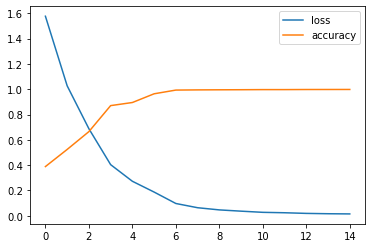

In [22]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

In [23]:
df_test = pd.read_csv('archive/mnist_test.csv')

In [24]:
df_test.shape

(10000, 785)

In [25]:
X_test = df_test.iloc[:,1:]
y_test = df_test.iloc[:,0]
X_test = X_test.astype('float32')
y_test = y_test.astype('float32')

In [26]:
X_test = X_test.values
y_test = y_test.values
X_test = X_test.reshape(X_test.shape[0],28,28,1)
X_test/=255

In [29]:
def predict(idx):
    img = X_test[idx]
    pred = model.predict(img.reshape(1,28,28,1)).argmax()
    Y = y_test[idx]
    print("Prediction = " + str(pred))
    print("Actual = "+ str(int(Y)))
    plt.imshow(img.reshape(28,28),cmap='Greys')

Prediction = 1
Actual = 1


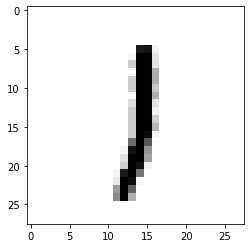

In [30]:
predict(393)

Prediction = 8
Actual = 8


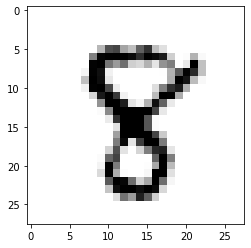

In [31]:
predict(3934)

Prediction = 1
Actual = 1


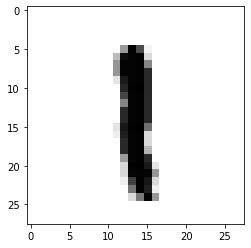

In [32]:
predict(9388)

Prediction = 0
Actual = 0


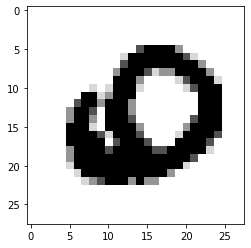

In [33]:
predict(5593)

Prediction = 2
Actual = 2


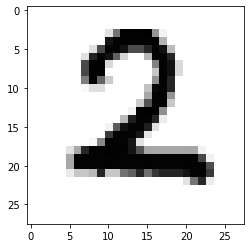

In [34]:
predict(3293)

In [47]:
correct = 0
for i in range(X_test.shape[0]):
    img = X_test[i]
    pred = model.predict(img.reshape(1,28,28,1)).argmax()
    Y = y_test[i]
    
    pred = int(pred)
    Y = int(Y)
    if(Y == pred):
        correct = correct + 1

In [49]:
print("Number of correct predictions = " + str(correct))

Number of correct predictions = 9905


In [51]:
accuracy = correct/X_test.shape[0]
print("Accuracy on test set = "+ str(accuracy))

Accuracy on test set = 0.9905
